In [13]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
import scipy
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion
from matplotlib import pyplot as plt
from scipy import stats
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import sem, t
from statsmodels.stats.weightstats import *
from statsmodels.sandbox.stats.multicomp import multipletests 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('water.txt',sep = '\t' )
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [6]:
x_n = df['mortality'].mean()

In [12]:
s = df['mortality'].std()
n = len(df)
z = 1.95966

In [13]:
s

187.6687539314571

In [14]:
x1 = x_n - z*s/np.sqrt(n)
x2 = x_n + z*s/np.sqrt(n)

In [15]:
print(x1,x2,sep = ' ')

1477.0598081210042 1571.235273846209


In [17]:
df_s = df[df['location'] == 'South']
x_n = df_s['mortality'].mean()
s = df_s['mortality'].std()/np.sqrt(len(df_s))

In [19]:
_tconfint_generic(x_n,s,len(df_s)-1,0.05,'two-sided')

(1320.1517462936238, 1433.463638321761)

In [20]:
df_s = df[df['location'] == 'North']
x_n = df_s['mortality'].mean()
s = df_s['mortality'].std()/np.sqrt(len(df_s))
_tconfint_generic(x_n,s,len(df_s)-1,0.05,'two-sided')

(1586.5605251961385, 1680.6394748038613)

In [21]:
df_s = df[df['location'] == 'South']
x_n = df_s['hardness'].mean()
s = df_s['hardness'].std()/np.sqrt(len(df_s))
_tconfint_generic(x_n,s,len(df_s)-1,0.05,'two-sided')

(53.467198692036106, 86.07126284642544)

In [22]:
df_s = df[df['location'] == 'North']
x_n = df_s['hardness'].mean()
s = df_s['hardness'].std()/np.sqrt(len(df_s))
_tconfint_generic(x_n,s,len(df_s)-1,0.05,'two-sided')

(21.42248728572426, 39.37751271427574)

In [5]:
alpha = 0.05
z = scipy.stats.norm.ppf(1 - alpha / 2.) 
p = 1./50
n = 50
x1 = p - z*np.sqrt(p*(1-p)/n)
x1

-0.018805307081790974

In [7]:
dov_int = proportion_confint(1, 
                                            n,
                                            method = 'wilson')
dov_int

(0.003539259271646236, 0.10495443589637815)

In [9]:
n_samples = int(samplesize_confint_proportion(p,0.01))
n_samples

752

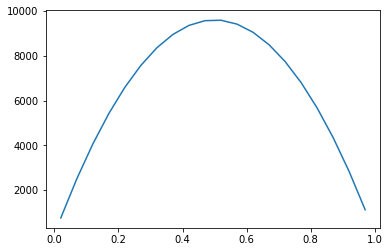

In [11]:
p = np.arange(0.02,1,0.05)
n_samples = [int(samplesize_confint_proportion(i,0.01)) for i in p]
plt.plot(p,n_samples)

In [12]:
max(n_samples)

9588

In [20]:
scipy.stats.norm.ppf(0.997) 

2.7477813854449926

In [19]:
1-0.06/2

0.97

In [21]:
alpha = 0.05
z = scipy.stats.norm.ppf(1 - alpha / 2.) 
p1 = 189./11034
p2 = 104./11037
left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ 11034 + p2 * (1 - p2)/ 11037)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ 11034 + p2 * (1 - p2)/ 11037)
print(left_boundary, right_boundary, sep = ' ')

0.004687750675049439 0.010724297276960124


In [22]:
(p1/(1-p1))/(p2/(1-p2))

1.8320539419087138

In [6]:
alpha = 0.003
z = scipy.stats.norm.ppf(1-alpha/2) 
z

2.9677379253417944

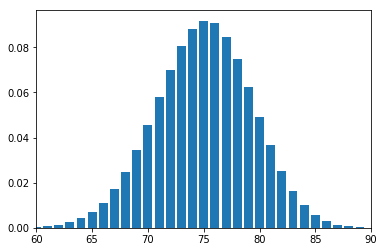

In [3]:
n = 100
F_H0 = stats.binom(n, 0.75)
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(60, 90) 
pylab.show()

In [7]:
stats.binom_test(67,n, 0.75,alternative='two-sided')

0.08222258891386608

In [9]:
F_H0.pmf(3)+F_H0.pmf(4)+F_H0.pmf(5)+F_H0.pmf(6)

0.18375043856878875

In [9]:
pines_data = pd.read_table('pines.txt')
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(pines_data.sn, pines_data.we, None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num


array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [11]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [5]:
z = (9.57 - 9.5)/(0.4/np.sqrt(160))
p = 2*(1 - stats.norm.cdf(np.abs(z)))
p

0.026856695507523787

In [28]:
df = pd.read_csv('diamonds.txt',sep='\t')
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [29]:
X = df.drop('price',axis = 1)
y = df['price']

In [30]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.25, random_state = 1)

In [31]:
lin_reg = LinearRegression()
for_reg = RandomForestRegressor(random_state=1)
lin_reg.fit(X_train,y_train)
for_reg.fit(X_train,y_train)

/home/dencerr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [32]:
lin_pred = lin_reg.predict(X_test)
for_pred = for_reg.predict(X_test)

In [33]:
mae_lin = np.abs(lin_pred - y_test)
mae_for = np.abs(for_pred - y_test)

In [22]:
mu_lin = np.mean(mae_lin)
mu_for = np.mean(mae_for)

In [23]:
print(mu_lin, mu_for, sep=' ')

890.3764004285579 802.9205172724141


In [40]:
scipy.stats.ttest_ind(mae_lin, mae_for, equal_var = False)

Ttest_indResult(statistic=6.205418446787019, pvalue=5.534495566294121e-10)

In [41]:
differ = mae_lin - mae_for
n = len(differ)
mu = np.mean(differ)
confidence = 0.95
std_err = sem(differ)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
start = mu - h
print(start)
end = mu + h
print(end)

74.28724532595464
100.62452098634319


In [52]:
cm = CompareMeans(DescrStatsW(mae_lin), DescrStatsW(mae_for))
cm.tconfint_diff(usevar='unequal')

(59.83194827974988, 115.0798180325478)

In [50]:
cm.tconfint_diff()

(59.83194833382869, 115.079817978469)

In [3]:
df = pd.read_csv('banknotes.txt',sep = '\t' )
df.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [4]:
X = df.drop('real',axis=1)
y = df['real']

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.25, random_state = 1)

In [16]:
clf_1 = LogisticRegression().fit(X_train[['X1','X2','X3']],y_train)
clf_2 = LogisticRegression().fit(X_train[['X4','X5','X6']],y_train)

/home/dencerr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dencerr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
pred_1 = clf_1.predict(X_test[['X1','X2','X3']])
pred_2 = clf_2.predict(X_test[['X4','X5','X6']])

In [19]:
1 - np.mean(pred_1)

0.54

In [20]:
1 - np.mean(pred_2)

0.43999999999999995

In [23]:
pred_1 = np.abs(pred_1 - 1)
pred_2 = np.abs(pred_2 - 1)

In [31]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample1)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [26]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [28]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [29]:
proportions_diff_z_test(proportions_diff_z_stat_rel(pred_1, pred_2))

0.0020282311484520754

In [32]:
l,r = proportions_diff_confint_rel(pred_1, pred_2, alpha = 0.05)
print(l,r,sep=' ')

0.058383853103821104 0.2616161468961789


In [33]:
z = (541.4 - 525)/(100/(np.sqrt(100)))
proportions_diff_z_test(z, alternative = 'greater')

0.05050258347410397

In [3]:
m0 = 200
stats.wilcoxon( np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362]) - m0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [4]:
stats.mannwhitneyu(np.array([22,22,15,13,19,19,18,20,21,13,13,15]), np.array([17, 18, 18, 15, 12, 4, 14, 15, 10]),alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

In [7]:
df = pd.read_csv('challenger.txt',sep = '\t' )
df

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0
5,Jun18.83,22.2,0
6,Aug30.83,22.8,0
7,Nov28.83,21.1,0
8,Feb03.84,13.9,1
9,Apr06.84,17.2,1


In [18]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [16]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [26]:
df_1 = df[df['Incident']==1]['Temperature']
df_2 = df[df['Incident']==0]['Temperature']

In [27]:
df_1

1     21.1
8     13.9
9     17.2
10    21.1
13    11.7
20    23.9
22    14.4
Name: Temperature, dtype: float64

In [29]:
np.random.seed = 0
samples_1 = get_bootstrap_samples(df_1.values, 1000)
samples_2 = get_bootstrap_samples(df_2.values, 1000)

In [34]:
mean_1 = np.mean(samples_1,axis = 1)
mean_2 = np.mean(samples_2,axis = 1)

In [35]:
samples_1

array([[13.9, 17.2, 21.1, ..., 23.9, 23.9, 21.1],
       [11.7, 23.9, 11.7, ..., 14.4, 21.1, 21.1],
       [17.2, 14.4, 14.4, ..., 21.1, 13.9, 23.9],
       ...,
       [21.1, 23.9, 17.2, ..., 21.1, 21.1, 11.7],
       [11.7, 13.9, 21.1, ..., 17.2, 13.9, 11.7],
       [11.7, 11.7, 11.7, ..., 17.2, 14.4, 11.7]])

In [43]:
delta_mean_scores = map(lambda x: x[0] - x[1], zip(mean_1, mean_2))

In [44]:
stat_intervals(list(delta_mean_scores), 0.05)

array([-7.91167411, -1.33229911])

In [46]:
np.mean(mean_1) - np.mean(mean_2)

-4.670977678571429

In [57]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, list(range(n)))) \
                    for index in itertools.combinations(list(range(n)), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [56]:
def permutation_test(sample_1, sample_2, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample_1, sample_2)
    
    zero_distr = permutation_zero_dist_ind(sample_1, sample_2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

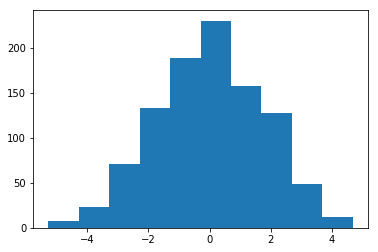

In [54]:
pylab.hist(permutation_zero_dist_ind(df_1, df_2, max_combinations = 1000))
pylab.show()

In [58]:
np.random.seed = 0
permutation_test(df_1, df_2, max_permutations = 10000, alternative = 'two-sided')

0.0064

In [60]:
df = pd.read_csv('illiteracy.txt', sep = '\t')
df.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [61]:
df.drop('Country',axis=1)
df.corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [62]:
df.corr('spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


In [64]:
df = pd.read_csv('water.txt', sep = '\t').drop(['location', 'town'],axis=1)
df.head()

,mortality,hardness
0,1247,105
1,1668,17
2,1466,5
3,1800,14
4,1609,18


In [66]:
df.corr('spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [67]:
df = pd.read_csv('water.txt', sep = '\t').drop(['town'],axis=1)
df.head()

,location,mortality,hardness
0,South,1247,105
1,North,1668,17
2,South,1466,5
3,North,1800,14
4,North,1609,18


In [68]:
df_s = df[df['location'] == 'South'].drop('location',axis=1)
df_n = df[df['location'] == 'North'].drop('location',axis=1)
df_s.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [69]:
df_n.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [70]:
def MCC(a,b,c,d):
    return (a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [72]:
MCC(203,718,239,515)

-0.10900237458678963

In [75]:
bars_sex = np.array([[203., 239.], [718., 515.]])

In [76]:
scipy.stats.chi2_contingency(bars_sex)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[243.03402985, 198.96597015],
        [677.96597015, 555.03402985]]))

In [77]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

In [78]:
proportions_diff_confint_ind(bars_sex[:,1], bars_sex[:,0], alpha = 0.05)

(0.053905233215813156, 0.13922183141523897)

In [79]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [80]:
proportions_diff_z_test(proportions_diff_z_stat_ind(bars_sex[:,1], bars_sex[:,0]))

8.153453089576601e-06

In [81]:
def chi_test(tabl:np.ndarray):
    i_pl = np.sum(tabl,axis = 0)
    j_pl = np.sum(tabl,axis = 1)
    n = np.sum(tabl)
    chi = 0
    for i in range(tabl.shape[0]):
        for j in range(tabl.shape[1]):
            chi += tabl[i][j]**2/(i_pl[i]*j_pl[j])
    chi = n*(chi - 1)
    return chi

In [83]:
tabl = np.array([[197., 111., 33.],
                 [382., 685., 331.],
                 [110., 342., 333.]])
chi_test(tabl)

876.3783562383177

In [4]:
df = pd.read_csv('AUCs.txt', sep = '\t')
df.head()

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898


In [11]:
def comp(df:pd.DataFrame):
    col_names = df.columns
    comp_arr = np.zeros((len(col_names),len(col_names)))
    for ind_1, name_1 in enumerate(col_names):
        for ind_2, name_2 in enumerate(col_names):
            comp_arr[ind_1][ind_2] = stats.wilcoxon(df[name_1] - df[name_2])[1]
    return pd.DataFrame(comp_arr,col_names,col_names)

In [12]:
comp_df = comp(df.drop('Unnamed: 0', axis = 1))
comp_df

/home/dencerr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/dencerr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/dencerr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/dencerr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
C4.5,NaN,0.010757,0.861262,0.015906
C4.5+m,0.010757,NaN,0.046333,0.327826
C4.5+cf,0.861262,0.046333,NaN,0.022909
C4.5+m+cf,0.015906,0.327826,0.022909,NaN


In [16]:
reject, p_corrected, a1, a2 = multipletests([0.010757,0.861262,0.015906,0.046333,0.327826,0.022909], alpha = 0.05, method = 'fdr_bh') 

In [17]:
reject

array([ True, False,  True, False, False,  True])